# Normal Mode Analysis (NMA)
### University of California, Berkeley - Spring 2024

# The entire alpha-catenin vinculin complex

## Introduction
Credit to Lab 8 in ME120

## [ProDy](http://prody.csb.pitt.edu/)

### Introduction

In [3]:
from prody import *
from pylab import *

ion() # turns interactive mode on

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


## Gaussian Network Model (GNM) Analysis with ProDy

In [4]:
# This is the alpha-catenin vinculin complex
cat_vin = parsePDB('4ehp')

# selecting all the carbon alpha atoms
c_alphas = cat_vin.select('calpha')
c_alphas2 = cat_vin.select('protein and name CA')
# confirming these two selections are the same, as expected, leading to just the backbone of the entire protein
c_alphas == c_alphas2

@> Connecting wwPDB FTP server RCSB PDB (USA).
@> 4ehp downloaded (4ehp.pdb.gz)
@> PDB download via FTP completed (1 downloaded, 0 failed).
@> 2790 atoms and 1 coordinate set(s) were parsed in 0.03s.


True

### Build Kirchhoff Matrix
First, Let's create a `GNM` object. 

In [6]:
gnm = GNM(name='cat_vin')

In [7]:
gnm.buildKirchhoff(coords=c_alphas, cutoff=10.0, gamma=1.0)
gnm.calcModes(n_modes=20, zeros=False, turbo=True)

@> Kirchhoff was built in 0.01s.


@> 20 modes were calculated in 0.05s.


In [8]:
gnm.getEigvals()
gnm.getEigvecs()
gnm.getCovariance()

array([[ 0.03944705,  0.03373601,  0.02781958, ..., -0.04164125,
        -0.04161637, -0.04157652],
       [ 0.03373601,  0.0296928 ,  0.02479795, ..., -0.03913496,
        -0.03912841, -0.03908426],
       [ 0.02781958,  0.02479795,  0.02117761, ..., -0.0381266 ,
        -0.0381512 , -0.03810699],
       ...,
       [-0.04164125, -0.03913496, -0.0381266 , ...,  0.64073217,
         0.64846506,  0.64623493],
       [-0.04161637, -0.03912841, -0.0381512 , ...,  0.64846506,
         0.65710153,  0.65466292],
       [-0.04157652, -0.03908426, -0.03810699, ...,  0.64623493,
         0.65466292,  0.65227655]])

@> WARNING matplotlib 3.6 and later are not compatible with interactive matrices
@> WARNING matplotlib 3.6 and later are not compatible with interactive matrices


(<matplotlib.image.AxesImage at 0x12dc67090>,
 [],
 [])

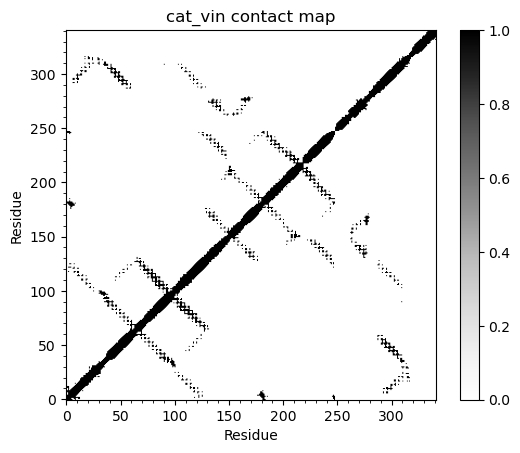

In [9]:
showContactMap(gnm)

Now the Kirchhoff matrix is built, we can get a copy of it using `gnm.getKirchhoff()` method.

@> WARNING matplotlib 3.6 and later are not compatible with interactive matrices
@> WARNING matplotlib 3.6 and later are not compatible with interactive matrices


(<matplotlib.image.AxesImage at 0x12de4cf90>,
 [],
 [])

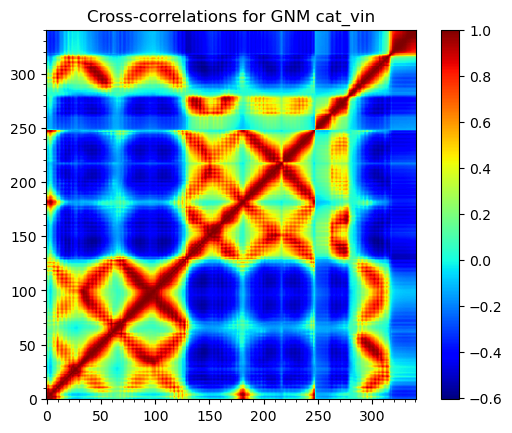

In [10]:
showCrossCorr(gnm)

### It's time to calculate the normal modes! :)
Now that we have the Kirchhoff matrix, Calculating the normal modes can be done simply by using `gnm.calcModes()` method.

Note that by default 20 non-zero (or non-trivial) modes and 1 trivial mode are calculated. Trivial modes are not retained. To calculate different numbers of non-zero modes or to keep zero modes, you can modify `n_modes` and `zeros` parameters of the function e.g. try `gnm.calcModes(50, zeros=True)`. You can set `Turbo` parameter tu `True` if you want to calculate the modes faster. It's also set by default to `True`.

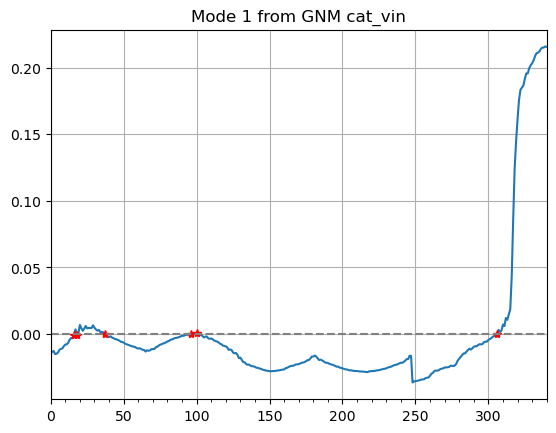

In [12]:
# showing the slowest mode
showMode(gnm[0], hinges=True, zero=True)
grid()

[([<matplotlib.lines.Line2D at 0x12e1cb510>], [], [], [])]

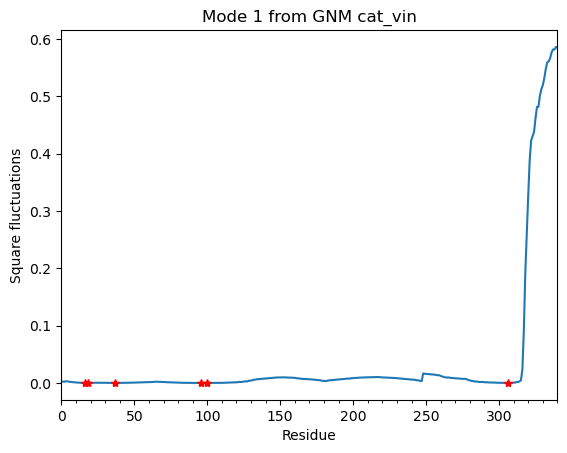

In [14]:
showSqFlucts(gnm[0], hinges=True)

<Axes3D: xlabel='x', ylabel='y', zlabel='z'>

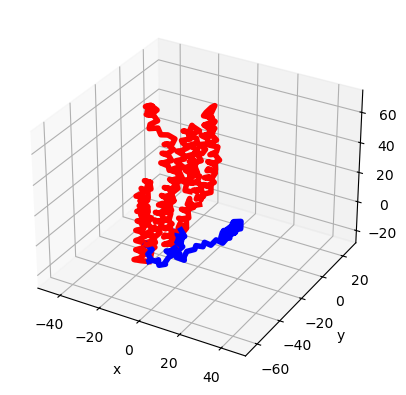

In [15]:
showProtein(c_alphas, mode=gnm[0])

#### Protein structure bipartition
Given a GNM mode, protein structure can be partitioned into two parts that move with respect to each other. The function `showProtein()` can take a __GNM mode__ as input and visualize the bipartition.

<Axes3D: xlabel='x', ylabel='y', zlabel='z'>

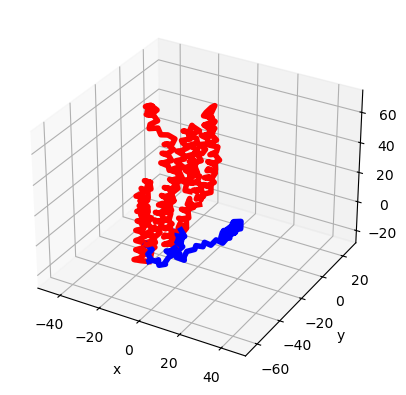

In [16]:
showProtein(c_alphas, mode=gnm[0])

In [17]:
# saving nmd file
writeNMD('4ehp.nmd', gnm[:3], c_alphas)

'4ehp.nmd'